## Modelling RANDOM FORESTS for yield of nanofibrillation prediction

### Data pre processing

In [1]:
#importing relevant libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Import relevant libraries for metrics (also from sklearn)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# setting style of sns graphs
sns.set_style('white')

In [2]:
import pickle  

In [3]:
# downloading to this notebook the excel file in a pd.dataframe format

df = pd.read_excel(r"C:\Users\giova\dataset_TEMPO.xlsx")

df

,ID,Sample,Transmittance at 600 nm at 0.1 wt.% (%),Cat demand (μeq/g),Viscosity (parameter K),Accumulated energy (kWh/dry kg),Yield (%)
0,0,T5 3*3 0.5%,0.2300,1113.537568,39.974,35.569621,0.402
1,1,T5 3*3 + 3*6 0.5%,0.5440,1204.544454,197.200,67.152404,0.833
2,2,T5 3*3 + 3*6 +3*9 0.5%,0.8330,1235.317174,73.801,102.018657,0.923
3,3,"T5 3*3 1% (With 1,5% fiber)",0.2320,1256.295919,107.460,16.093474,0.422
4,4,"T5 3*3 + 3*6 1% (With 1,5% fiber)",0.5945,1417.310421,646.130,28.968899,0.860
5,5,"T5 3*3 + 3*6 +3*9 1% (With 1,5% fiber)",0.8341,1319.968085,255.930,43.953874,0.935
6,6,T5 3*3 1.5%,0.2520,1225.271464,107.970,10.994256,0.397
7,7,T5 3*3 + 3*6 1.5%,0.5664,1228.284175,850.970,21.503336,0.843
8,8,T5 3*3 + 3*6 +3*9 1.5%,0.8123,1253.735568,471.470,34.268160,0.940
9,9,T5 3*3 2%,0.2890,1124.377617,202.480,11.048491,0.400


In [4]:
df.columns

Index(['ID', 'Sample', 'Transmittance at 600 nm at 0.1 wt.% (%)',
       'Cat demand (μeq/g)', 'Viscosity (parameter K)',
       'Accumulated energy (kWh/dry kg)', 'Yield (%)'],
      dtype='object')

In [5]:
#we can get rid of the index column, once it is practically the same as the df index:

df = df[['Transmittance at 600 nm at 0.1 wt.% (%)',
       'Cat demand (μeq/g)', 'Viscosity (parameter K)',
       'Accumulated energy (kWh/dry kg)', 'Yield (%)']].copy()
df

,Transmittance at 600 nm at 0.1 wt.% (%),Cat demand (μeq/g),Viscosity (parameter K),Accumulated energy (kWh/dry kg),Yield (%)
0,0.2300,1113.537568,39.974,35.569621,0.402
1,0.5440,1204.544454,197.200,67.152404,0.833
2,0.8330,1235.317174,73.801,102.018657,0.923
3,0.2320,1256.295919,107.460,16.093474,0.422
4,0.5945,1417.310421,646.130,28.968899,0.860
5,0.8341,1319.968085,255.930,43.953874,0.935
6,0.2520,1225.271464,107.970,10.994256,0.397
7,0.5664,1228.284175,850.970,21.503336,0.843
8,0.8123,1253.735568,471.470,34.268160,0.940
9,0.2890,1124.377617,202.480,11.048491,0.400


In [6]:
X_df = df[['Transmittance at 600 nm at 0.1 wt.% (%)',
       'Cat demand (μeq/g)', 'Viscosity (parameter K)',
       'Accumulated energy (kWh/dry kg)']]
y_df = df[['Yield (%)']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df,
                                                        test_size = 0.34,
                                                        random_state =8
                                                       )

In [8]:
X_train

,Transmittance at 600 nm at 0.1 wt.% (%),Cat demand (μeq/g),Viscosity (parameter K),Accumulated energy (kWh/dry kg)
6,0.2520,1225.271464,107.970,10.994256
0,0.2300,1113.537568,39.974,35.569621
13,0.4315,1414.360612,2654.700,249.851067
8,0.8123,1253.735568,471.470,34.268160
5,0.8341,1319.968085,255.930,43.953874
9,0.2890,1124.377617,202.480,11.048491
1,0.5440,1204.544454,197.200,67.152404
4,0.5945,1417.310421,646.130,28.968899
3,0.2320,1256.295919,107.460,16.093474


In [9]:
y_train

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


R2 score: 0.9629278284164817
MAE: 0.04094666666666661
MAPE: 0.06785104862099542
RSME: 0.04463983945610324


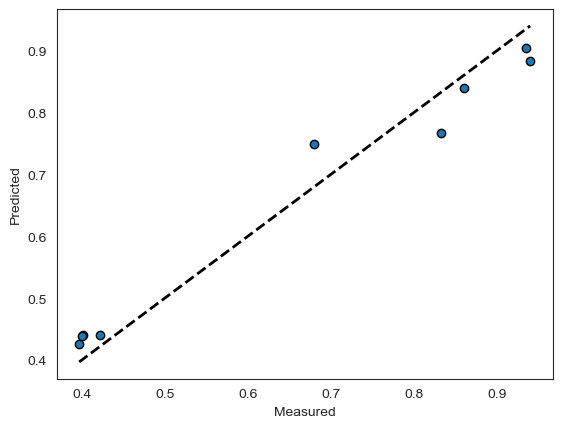

In [16]:
RF_randomodel_v1 = RandomForestRegressor(random_state=0)
RF_randomodel_v1.fit(X_train, y_train.values.ravel())
pred_RF_v1 = RF_randomodel_v1.predict(X_train)

print("R2 score:", r2_score(y_train, pred_RF_v1))
print("MAE:", mean_absolute_error(y_train, pred_RF_v1))
print("MAPE:", mean_absolute_percentage_error(y_train, pred_RF_v1))
print("RSME:", mean_squared_error(y_train, pred_RF_v1, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train, pred_RF_v1, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [23]:
#training score highly related to the samples that go to the training set
#also, maybe putting number of passes (like a code for that) could increase the models prediction capacity (most probably)

In [18]:
y_train

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [19]:
pred_RF_v1

array([0.42667, 0.44099, 0.74852, 0.88345, 0.90477, 0.43943, 0.76647,
       0.83992, 0.44052])

R2 score: 0.7211027129018899
MAE: 0.09864399999999987
MAPE: 0.17212653220901578
RSME: 0.11531299302333606


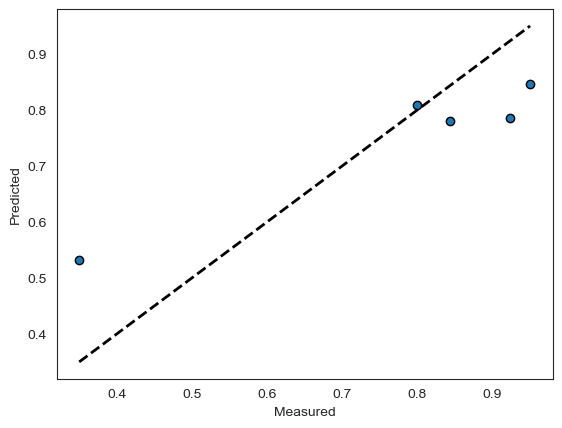

In [20]:
# fazendo o teste com test subset 
pred_test_RF_v1 = RF_randomodel_v1.predict(X_test)

print("R2 score:", r2_score(y_test, pred_test_RF_v1))
print("MAE:", mean_absolute_error(y_test, pred_test_RF_v1))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test_RF_v1))
print("RSME:", mean_squared_error(y_test, pred_test_RF_v1, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test_RF_v1, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [21]:
y_test

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [25]:
pred_test_RF_v1

array([0.80827, 0.78042, 0.78562, 0.84635, 0.53134])

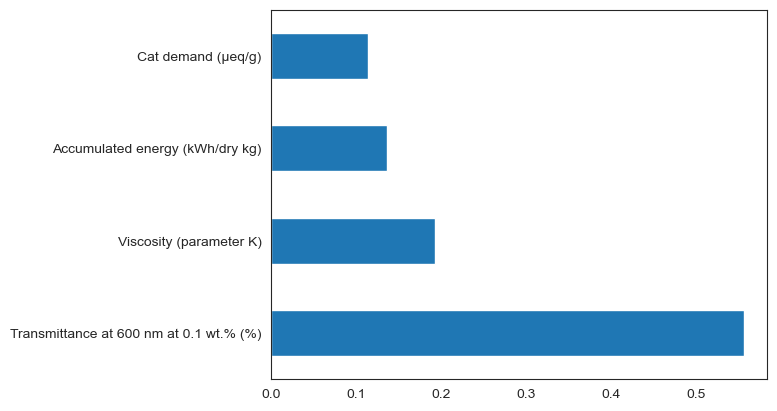

In [28]:
#vendo a feature importance

feat_importances_model_RF = pd.Series(RF_randomodel_v1.feature_importances_, index=X_df.columns)
feat_importances_model_RF.nlargest(4).plot(kind='barh');
    

In [30]:
#provando sem a demanda cationica primeiro (a principio nao muda tanto)

In [10]:
X_df_2 = df[['Transmittance at 600 nm at 0.1 wt.% (%)',
        'Viscosity (parameter K)',
       'Accumulated energy (kWh/dry kg)']]

In [11]:
X_train_2 = X_df_2.loc[[6,0,13,8,5,9,1,4,3]]
y_train_2 = y_df.loc[[6,0,13,8,5,9,1,4,3]]

In [12]:
X_test_2 = X_df_2.loc[[10,7,2,11,12]]
y_test_2 = y_df.loc[[10,7,2,11,12]]

R2 score: 0.9728095821759519
MAE: 0.03282222222222227
MAPE: 0.05478878971761266
RSME: 0.03823019836028409


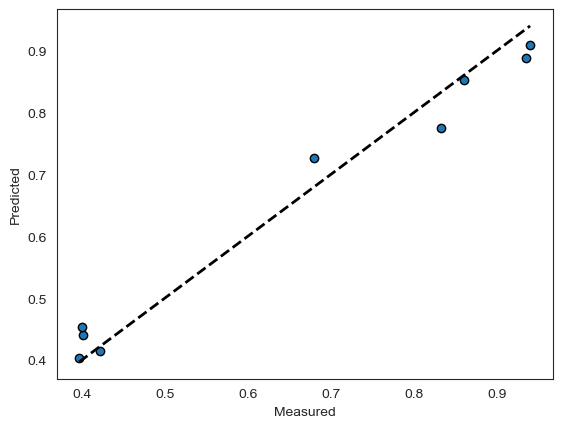

In [34]:
RF_randomodel_v2 = RandomForestRegressor(random_state=0)
RF_randomodel_v2.fit(X_train_2, y_train_2.values.ravel())
pred_RF_v2 = RF_randomodel_v2.predict(X_train_2)

print("R2 score:", r2_score(y_train_2, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_2, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_2, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_2, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_2, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [35]:
y_train_2

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [36]:
pred_RF_v2

array([0.40282, 0.44121, 0.72667, 0.90882, 0.88847, 0.45333, 0.77548,
       0.85261, 0.41425])

R2 score: 0.77734639459903
MAE: 0.08412599999999999
MAPE: 0.13924188818970923
RSME: 0.10303172375535602


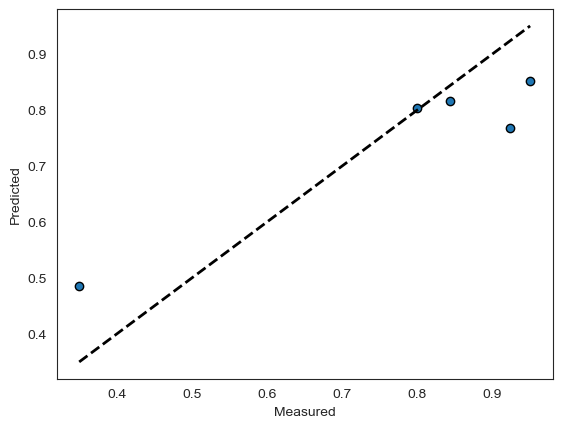

In [37]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v2.predict(X_test_2)

print("R2 score:", r2_score(y_test_2, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_2, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_2, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_2, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_2, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [38]:
y_test_2

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [39]:
pred_test_RF_v2

array([0.80329, 0.81521, 0.76705, 0.85177, 0.48537])

In [40]:
#provavelmente tirar a demanda cationica ajudou um pouco o modelo a nao se confundir tanto, ja que eram muito parecidas entre as amostras

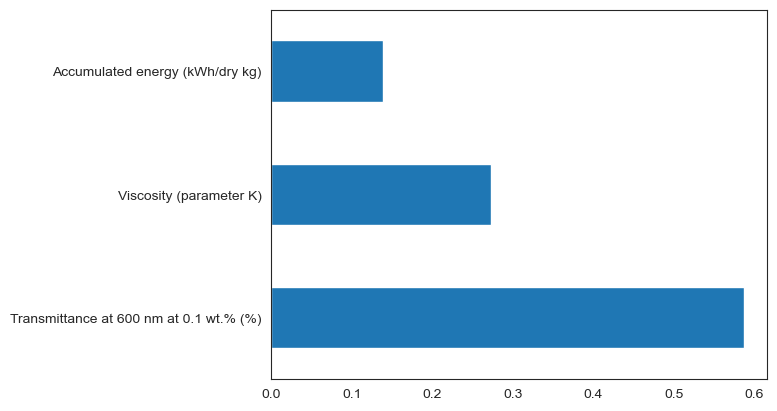

In [41]:
#vendo a feature importance

feat_importances_model_RF = pd.Series(RF_randomodel_v2.feature_importances_, index=X_df_2.columns)
feat_importances_model_RF.nlargest(7).plot(kind='barh');

In [43]:
#provando sem o accumulated energy

In [44]:
X_df_2 = df[['Transmittance at 600 nm at 0.1 wt.% (%)',
        'Viscosity (parameter K)']]

In [45]:
X_train_2 = X_df_2.loc[[6,0,13,8,5,9,1,4,3]]
y_train_2 = y_df.loc[[6,0,13,8,5,9,1,4,3]]

In [46]:
X_test_2 = X_df_2.loc[[10,7,2,11,12]]
y_test_2 = y_df.loc[[10,7,2,11,12]]

R2 score: 0.9790622422046433
MAE: 0.02603222222222214
MAPE: 0.04215630587405425
RSME: 0.03354777306734042


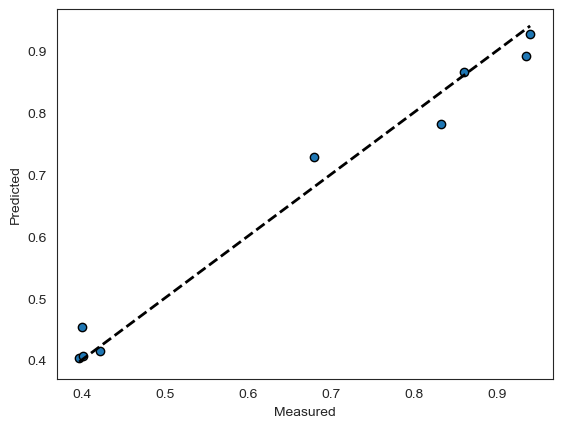

In [47]:
RF_randomodel_v2 = RandomForestRegressor(random_state=0)
RF_randomodel_v2.fit(X_train_2, y_train_2.values.ravel())
pred_RF_v2 = RF_randomodel_v2.predict(X_train_2)

print("R2 score:", r2_score(y_train_2, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_2, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_2, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_2, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_2, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [48]:
y_train_2

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [49]:
pred_RF_v2

array([0.40356, 0.40596, 0.72886, 0.92711, 0.89081, 0.45375, 0.78216,
       0.86545, 0.41421])

R2 score: 0.7614388250523951
MAE: 0.0909859999999997
MAPE: 0.14634204484991448
RSME: 0.10664880224362551


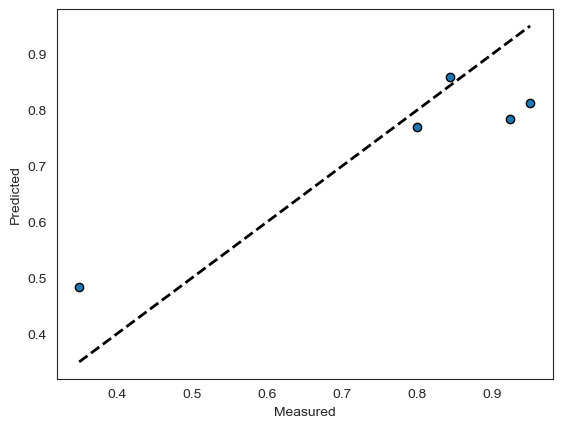

In [50]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v2.predict(X_test_2)

print("R2 score:", r2_score(y_test_2, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_2, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_2, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_2, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_2, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [51]:
y_test_2

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [52]:
pred_test_RF_v2

array([0.77038, 0.85951, 0.78461, 0.81288, 0.48329])

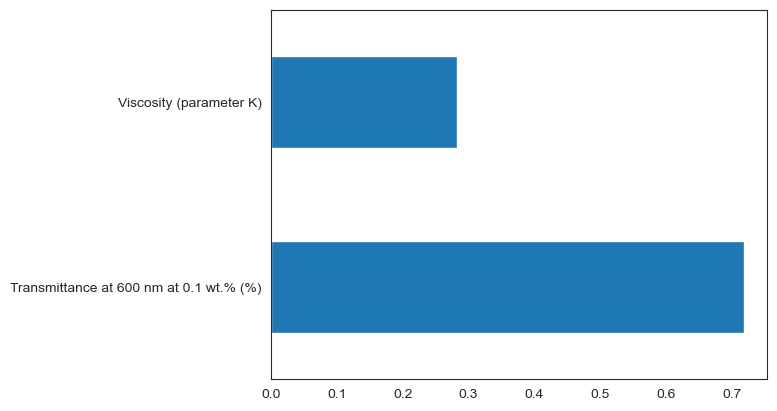

In [53]:
#vendo a feature importance

feat_importances_model_RF = pd.Series(RF_randomodel_v2.feature_importances_, index=X_df_2.columns)
feat_importances_model_RF.nlargest(7).plot(kind='barh');

In [54]:
#provando só a transmitancia

In [10]:
X_df_2 = df[['Transmittance at 600 nm at 0.1 wt.% (%)']]

In [11]:
X_train_2 = X_df_2.loc[[6,0,13,8,5,9,1,4,3]]
y_train_2 = y_df.loc[[6,0,13,8,5,9,1,4,3]]

In [12]:
X_test_2 = X_df_2.loc[[10,7,2,11,12]]
y_test_2 = y_df.loc[[10,7,2,11,12]]

R2 score: 0.9986623668044882
MAE: 0.0077244444444445025
MAPE: 0.011886136945363841
RSME: 0.008479439184810006


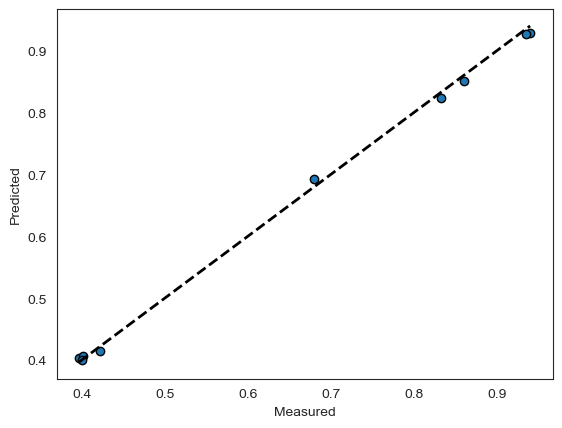

In [13]:
RF_randomodel_v2 = RandomForestRegressor(random_state=0)
RF_randomodel_v2.fit(X_train_2, y_train_2.values.ravel())
pred_RF_v2 = RF_randomodel_v2.predict(X_train_2)

print("R2 score:", r2_score(y_train_2, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_2, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_2, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_2, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_2, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [59]:
y_train_2

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [60]:
pred_RF_v2

array([0.40356, 0.40596, 0.69274, 0.92861, 0.92676, 0.40067, 0.82407,
       0.85021, 0.41476])

R2 score: 0.9726838310678277
MAE: 0.025429999999999973
MAPE: 0.045027817624743845
RSME: 0.0360882642974138


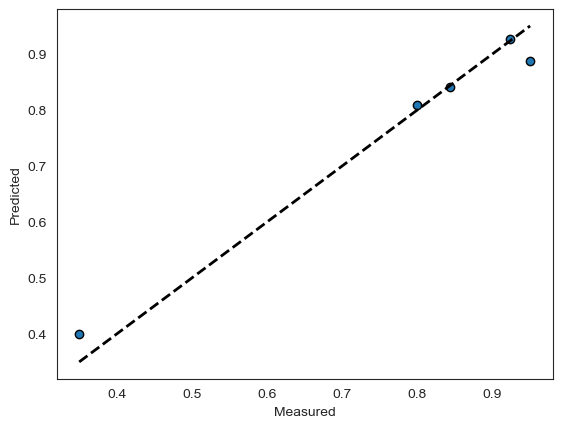

In [61]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v2.predict(X_test_2)

print("R2 score:", r2_score(y_test_2, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_2, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_2, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_2, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_2, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [62]:
y_test_2

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [63]:
pred_test_RF_v2

array([0.80808, 0.84022, 0.92676, 0.88691, 0.39944])

R2 score: 0.9985861075651513
MAE: 0.004222222222222207
MAPE: 0.009391901187699845
RSME: 0.00871779788708133


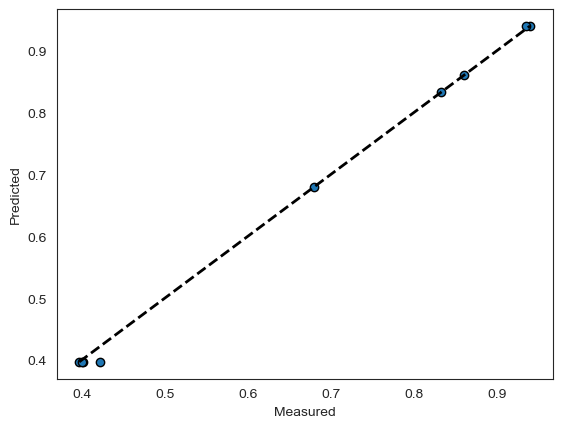

In [36]:
RF_randomodel_v2 = RandomForestRegressor(n_estimators = 1, random_state=0)
RF_randomodel_v2.fit(X_train_2, y_train_2.values.ravel())
pred_RF_v2 = RF_randomodel_v2.predict(X_train_2)

print("R2 score:", r2_score(y_train_2, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_2, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_2, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_2, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_2, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [37]:
y_train_2

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [38]:
pred_RF_v2

array([0.397, 0.397, 0.68 , 0.94 , 0.94 , 0.397, 0.833, 0.86 , 0.397])

R2 score: 0.9505551481877352
MAE: 0.03939999999999997
MAPE: 0.06011063082236072
RSME: 0.0485530637550299


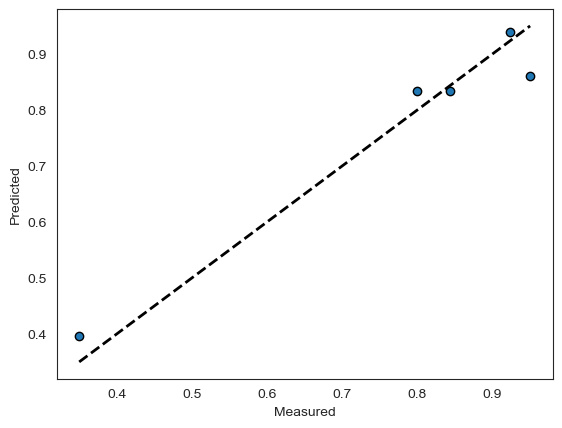

In [39]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v2.predict(X_test_2)

print("R2 score:", r2_score(y_test_2, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_2, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_2, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_2, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_2, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [34]:
y_test_2

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [35]:
pred_test_RF_v2

array([0.7572, 0.8652, 0.937 , 0.876 , 0.3982])

In [13]:
#doing a single decision tree, because it looks that the model is too simple for having a RF

from sklearn.tree import DecisionTreeRegressor

R2 score: 1.0
MAE: 0.0
MAPE: 0.0
RSME: 0.0


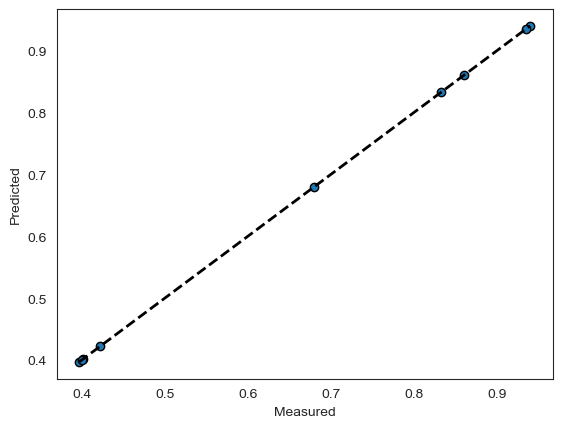

In [14]:
RF_dectree = DecisionTreeRegressor(random_state=0, min_samples_leaf=1)
RF_dectree.fit(X_train_2, y_train_2.values.ravel())
pred_RF_v2 = RF_dectree.predict(X_train_2)

print("R2 score:", r2_score(y_train_2, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_2, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_2, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_2, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_2, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [41]:
y_train_2

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [42]:
pred_RF_v2

array([0.3985    , 0.412     , 0.7565    , 0.91166667, 0.91166667,
       0.3985    , 0.7565    , 0.91166667, 0.412     ])

R2 score: 0.9499426981695296
MAE: 0.03899999999999999
MAPE: 0.060741492918011585
RSME: 0.04885284024496425


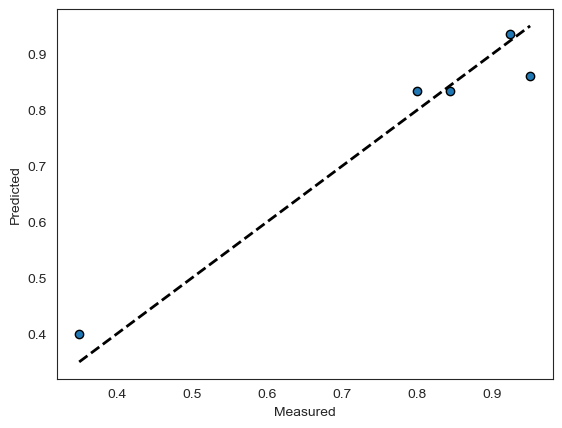

In [15]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_dectree.predict(X_test_2)

print("R2 score:", r2_score(y_test_2, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_2, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_2, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_2, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_2, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [18]:
y_test_2

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [19]:
pred_test_RF_v2

array([0.7572, 0.8652, 0.937 , 0.876 , 0.3982])

In [64]:
#pelo jeito, ter todas as outras features atrapalha o modelo, confunde ele. Vou fazer com o cationic demand e vou fazer
# uma LR so com transmitancia 

In [72]:
#modelo com demanda cat e transmitancia

In [73]:
X_df.columns

Index(['Transmittance at 600 nm at 0.1 wt.% (%)', 'Cat demand (μeq/g)',
       'Viscosity (parameter K)', 'Accumulated energy (kWh/dry kg)'],
      dtype='object')

In [89]:
X_df_3 = df[['Transmittance at 600 nm at 0.1 wt.% (%)',
             'Cat demand (μeq/g)']]

In [90]:
X_train_3 = X_df_2.loc[[6,0,13,8,5,9,1,4,3]]
y_train_3 = y_df.loc[[6,0,13,8,5,9,1,4,3]]

In [91]:
X_test_3 = X_df_2.loc[[10,7,2,11,12]]
y_test_3 = y_df.loc[[10,7,2,11,12]]

R2 score: 0.9846369654092455
MAE: 0.024152222222222193
MAPE: 0.03748274535935156
RSME: 0.028736714611567432


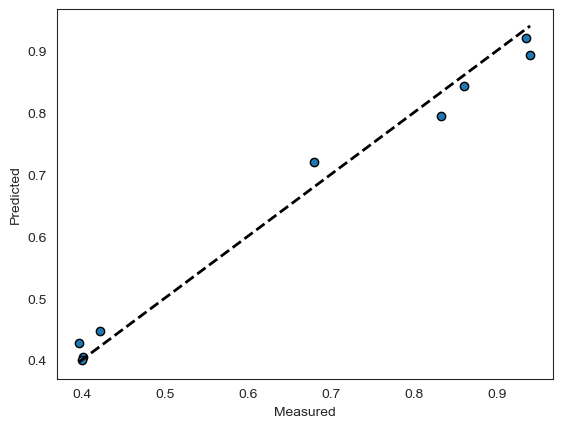

In [92]:
RF_randomodel_v2 = RandomForestRegressor(random_state=0)
RF_randomodel_v2.fit(X_train_3, y_train_3.values.ravel())
pred_RF_v2 = RF_randomodel_v2.predict(X_train_2)

print("R2 score:", r2_score(y_train_3, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_3, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_3, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_3, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_3, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_3.min(), y_train_3.max()], [y_train_3.min(), y_train_3.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [93]:
y_train_3

,Yield (%)
6,0.397
0,0.402
13,0.680
8,0.940
5,0.935
9,0.400
1,0.833
4,0.860
3,0.422


In [94]:
pred_RF_v2

array([0.42743, 0.40505, 0.72052, 0.89294, 0.92085, 0.40052, 0.79455,
       0.8422 , 0.44739])

R2 score: 0.8935416298217861
MAE: 0.06255199999999997
MAPE: 0.11484518836553419
RSME: 0.07124362455686803


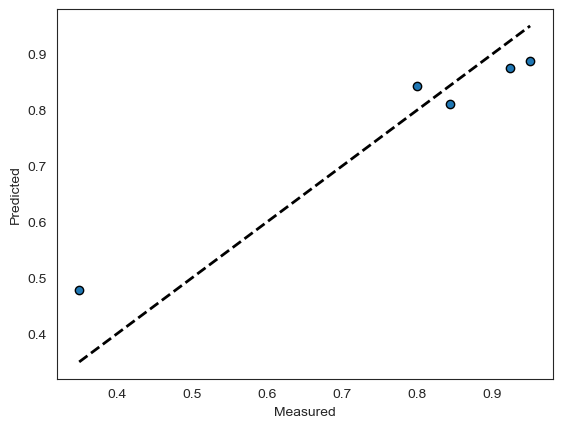

In [95]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v2.predict(X_test_3)

print("R2 score:", r2_score(y_test_3, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_3, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_3, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_3, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_3, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [96]:
y_test_3

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [97]:
pred_test_RF_v2

array([0.84252, 0.8107 , 0.87545, 0.88753, 0.47792])

In [101]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Ajustando o modelo aos dados de treinamento
model.fit(X_train_2, y_train_2)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test_2)

# Coeficientes do modelo
print(f"Coeficiente: {model.coef_[0][0]}")
print(f"Intercepto: {model.intercept_[0]}")

# Plotando os resultados
#plt.scatter(X, y, color='blue', label='Dados reais')
#plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de regressão')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.title('Regressão Linear')
#plt.legend()
#plt.show()

Coeficiente: 0.9765696797169263
Intercepto: 0.19427354371137784


R2 score: 0.9200612652526389
MAE: 0.057361613845463816
MAPE: 0.08860460508910557
RSME: 0.06555068672017944


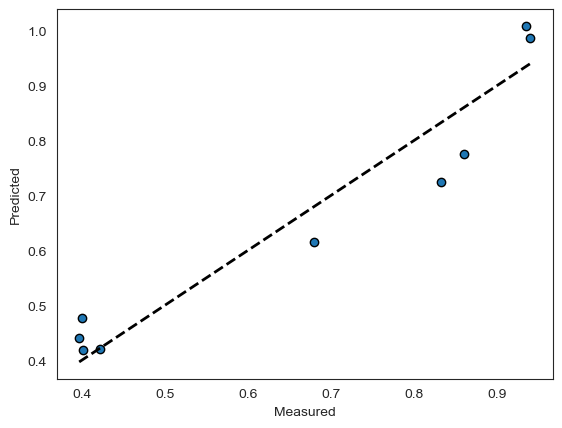

In [102]:
pred_LR_v1 = model.predict(X_train_2)

print("R2 score:", r2_score(y_train_2, pred_LR_v1))
print("MAE:", mean_absolute_error(y_train_2, pred_LR_v1))
print("MAPE:", mean_absolute_percentage_error(y_train_2, pred_LR_v1))
print("RSME:", mean_squared_error(y_train_2, pred_LR_v1, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_2, pred_LR_v1, edgecolors=(0, 0, 0))
ax.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

R2 score: 0.8241086730180692
MAE: 0.09100368005180745
MAPE: 0.14133078916650665
RSME: 0.09157529206830425


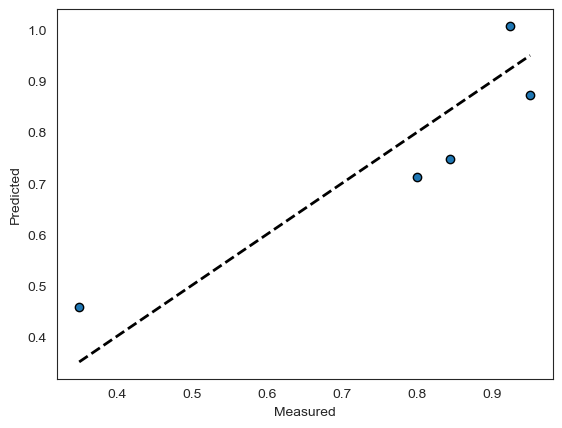

In [103]:
# fazendo o teste com test subset 
pred_test_LR_v1 = model.predict(X_test_2)

print("R2 score:", r2_score(y_test_2, pred_test_LR_v1))
print("MAE:", mean_absolute_error(y_test_2, pred_test_LR_v1))
print("MAPE:", mean_absolute_percentage_error(y_test_2, pred_test_LR_v1))
print("RSME:", mean_squared_error(y_test_2, pred_test_LR_v1, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_2, pred_test_LR_v1, edgecolors=(0, 0, 0))
ax.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [104]:
#pelo jeito nao é muito bom um modelo linear só com a transmitancia

In [105]:
y_test_2

,Yield (%)
10,0.800
7,0.843
2,0.923
11,0.950
12,0.350


In [106]:
pred_test_LR_v1

array([[0.71126953],
       [0.74740261],
       [1.00775609],
       [0.8720129 ],
       [0.45794736]])

In [107]:
#Falta:
# tentar retreinar o mesmo modelo antigo com os dados antigos e os novos (talvez role, talvez nao, ver oq seria melhor)
# testar outros train/test split só com transmitancia, ver se muda muito os scores
# pensar se vale a pena por infos de consistencia ou passagens no homogeneizador?

In [44]:
# downloading to this notebook the excel file with TEMPO data and enzymatic/mec data

df_todos = pd.read_excel(r"C:\Users\giova\tabela_todos_dados.xlsx")

df_todos

,Sample,Cationic demand (µeq/g),Transmittance at 600 nm (%),Yield of nanofibrillation (%)
0,Eucamec(3),184.000000,0.0950,0.102366
1,Eucamec(3+1),195.000000,0.1070,0.115687
2,Eucamec(3+3),208.000000,0.1320,0.165490
3,Eucamec(3+3+1),213.000000,0.1660,0.189679
4,Eucamec(3+3+3),215.000000,0.1940,0.204288
...,...,...,...,...
149,T5 3*3 2%,1124.377617,0.2890,0.400000
150,T5 3*3 + 3*6 2%,1299.364299,0.5294,0.800000
151,T5 3*3 + 3*6 +3*9 2%,1336.379268,0.6940,0.950000
152,T5 3*3 3%,1353.992713,0.2700,0.350000


In [45]:
df_todos.columns

Index(['Sample', 'Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'Yield of nanofibrillation (%)'],
      dtype='object')

In [48]:
X_df_trans = df_todos[['Transmittance at 600 nm (%)']]
y_df_todos = df_todos[['Yield of nanofibrillation (%)']]

In [49]:
X_train_td, X_test_td, y_train_td, y_test_td = train_test_split(X_df_trans, y_df_todos,
                                                        test_size = 0.34,
                                                        random_state =8
                                                       )

R2 score: 0.9960237447783605
MAE: 0.007210926360705227
MAPE: 0.040939400345800694
RSME: 0.012233173265949254


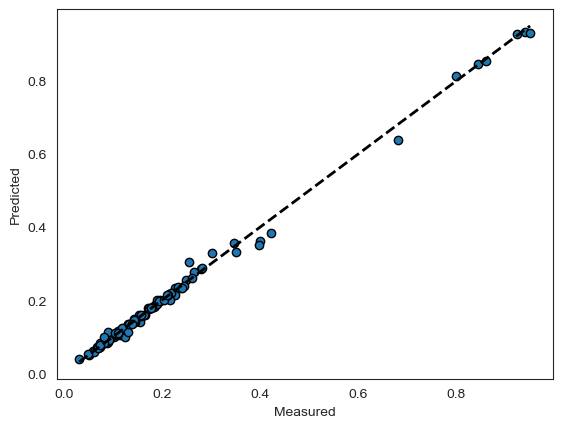

In [51]:
RF_randomodel_v4 = RandomForestRegressor(random_state=0)
RF_randomodel_v4.fit(X_train_td, y_train_td.values.ravel())
pred_RF_v2 = RF_randomodel_v4.predict(X_train_td)

print("R2 score:", r2_score(y_train_td, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_td, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_td, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_td, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_td, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_td.min(), y_train_td.max()], [y_train_td.min(), y_train_td.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

R2 score: 0.9709584797861347
MAE: 0.0163443662480698
MAPE: 0.11486673970574171
RSME: 0.026635512186189807


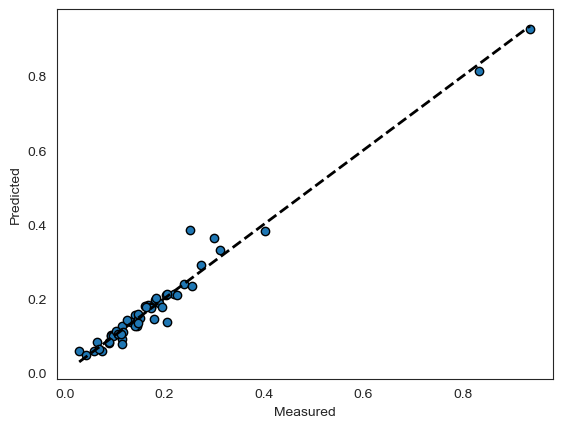

In [52]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v4.predict(X_test_td)

print("R2 score:", r2_score(y_test_td, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_td, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_td, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_td, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_td, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_td.min(), y_test_td.max()], [y_test_td.min(), y_test_td.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

R2 score: 0.9953153126115114
MAE: 0.008059454571187993
MAPE: 0.0469352288092773
RSME: 0.013278294861836796


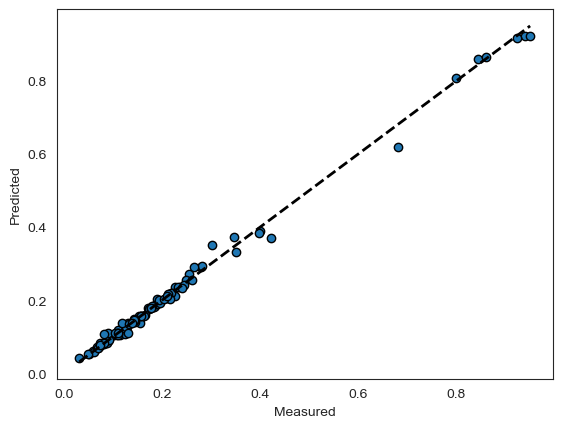

In [70]:
RF_randomodel_v4 = RandomForestRegressor(n_estimators = 10 , min_samples_leaf= 1, random_state=0)
RF_randomodel_v4.fit(X_train_td, y_train_td.values.ravel())
pred_RF_v2 = RF_randomodel_v4.predict(X_train_td)

print("R2 score:", r2_score(y_train_td, pred_RF_v2))
print("MAE:", mean_absolute_error(y_train_td, pred_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_train_td, pred_RF_v2))
print("RSME:", mean_squared_error(y_train_td, pred_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_train_td, pred_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_td.min(), y_train_td.max()], [y_train_td.min(), y_train_td.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

R2 score: 0.9690093363101185
MAE: 0.017408309262765532
MAPE: 0.11796470820557285
RSME: 0.027514828984637366


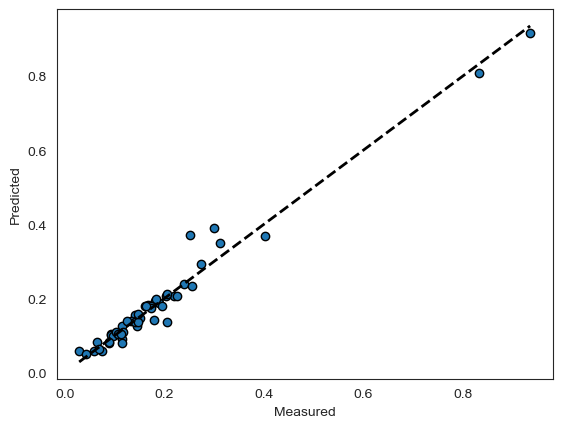

In [71]:
# fazendo o teste com test subset 
pred_test_RF_v2 = RF_randomodel_v4.predict(X_test_td)

print("R2 score:", r2_score(y_test_td, pred_test_RF_v2))
print("MAE:", mean_absolute_error(y_test_td, pred_test_RF_v2))
print("MAPE:", mean_absolute_percentage_error(y_test_td, pred_test_RF_v2))
print("RSME:", mean_squared_error(y_test_td, pred_test_RF_v2, squared = False))

fig, ax = plt.subplots()
ax.scatter(y_test_td, pred_test_RF_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_td.min(), y_test_td.max()], [y_test_td.min(), y_test_td.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [72]:
#usando o modelo otimizado do ultimo paper

from pickle import load

# load the model
model_RF_yield_paper = load(open('RF_results_compiled_3_YI_case2.pkl', 'rb'))

C:\Users\giova\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [73]:
# apparently the model was trained in an old version and now doesn't run in my current updated scikit learn
#check how to tackle this

In [22]:
#13/02/2023 note
#RF_randomodel_v6_alt_MODEL_TS = 'RF_randomodel_v6_alt_MODEL_TS.pkl'
#pickle.dump(RF_randomodel_v6_alt, open(RF_randomodel_v6_alt_MODEL_TS, 'wb'))